# Логистическая регрессия

В основе - 2 класса объектов - задачей бинарной классификации (вероятность принадлежности к тому или иному классу).\
Целевая переменная ограничена дискретным набором значений

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Inga/Market_test/Логистическая регрессия/tips_extended.csv')

In [3]:
df[:2]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips
0,16,1,bike,morning,0
1,23,2,bike,morning,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              50 non-null     int64 
 1   Number_of_People  50 non-null     int64 
 2   Arrived_in        46 non-null     object
 3   Time_of_visit     48 non-null     object
 4   Tips              50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [5]:
df.Tips.value_counts()

0     28
5      8
8      2
10     2
20     2
4      2
9      1
2      1
3      1
6      1
7      1
15     1
Name: Tips, dtype: int64

In [6]:
df.Arrived_in.value_counts()

bike    24
car     22
Name: Arrived_in, dtype: int64

In [7]:
df.Number_of_People.value_counts()

1    15
2    13
3     6
5     6
4     4
6     2
7     2
0     1
8     1
Name: Number_of_People, dtype: int64

In [8]:
df.Bill.value_counts()

27     3
17     3
16     2
10     2
7      2
22     2
19     2
90     2
8      2
83     1
67     1
86     1
36     1
165    1
55     1
100    1
135    1
278    1
94     1
93     1
112    1
120    1
53     1
48     1
11     1
129    1
23     1
25     1
35     1
0      1
37     1
41     1
45     1
12     1
15     1
52     1
56     1
13     1
150    1
Name: Bill, dtype: int64

In [9]:
df.Time_of_visit.value_counts()

morning      17
evening      16
afternoon    14
mor           1
Name: Time_of_visit, dtype: int64

__Как заменить mor?__

In [10]:
df.Time_of_visit.loc[df.Time_of_visit == 'mor']

21    mor
Name: Time_of_visit, dtype: object

In [11]:
df.Time_of_visit.iloc[21] = df.Time_of_visit.iloc[21].replace('mor', 'morning')

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\63678034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Time_of_visit.iloc[21] = df.Time_of_visit.iloc[21].replace('mor', 'morning')


In [12]:
df.Time_of_visit.value_counts()

morning      18
evening      16
afternoon    14
Name: Time_of_visit, dtype: int64

In [13]:
df2 = df.dropna()

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              44 non-null     int64 
 1   Number_of_People  44 non-null     int64 
 2   Arrived_in        44 non-null     object
 3   Time_of_visit     44 non-null     object
 4   Tips              44 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [15]:
def get_tips_cat(tips):
    if tips > 0:
        return '1'
    elif tips < 1:
        return '0'
    else:
        return tips
   

In [16]:
df2['Tips_cat'] = df2['Tips'].apply(get_tips_cat)

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\3335740049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tips_cat'] = df2['Tips'].apply(get_tips_cat)


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              44 non-null     int64 
 1   Number_of_People  44 non-null     int64 
 2   Arrived_in        44 non-null     object
 3   Time_of_visit     44 non-null     object
 4   Tips              44 non-null     int64 
 5   Tips_cat          44 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.4+ KB


In [18]:
df2['Tips_cat'] = df2['Tips_cat'].astype(int)

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\2237268995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tips_cat'] = df2['Tips_cat'].astype(int)


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              44 non-null     int64 
 1   Number_of_People  44 non-null     int64 
 2   Arrived_in        44 non-null     object
 3   Time_of_visit     44 non-null     object
 4   Tips              44 non-null     int64 
 5   Tips_cat          44 non-null     int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 2.2+ KB


In [20]:
df2[:2]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat
0,16,1,bike,morning,0,0
1,23,2,bike,morning,0,0


In [21]:
df2['Tips_cat'].value_counts()

0    25
1    19
Name: Tips_cat, dtype: int64

In [22]:
# df2['Tips_1'] = df2['Tips'].astype('category')
# df2['Tips_code'] = df2['Tips_1'].cat.codes

In [23]:
# df2.info()

In [24]:
# df2.Tips_code.value_counts()

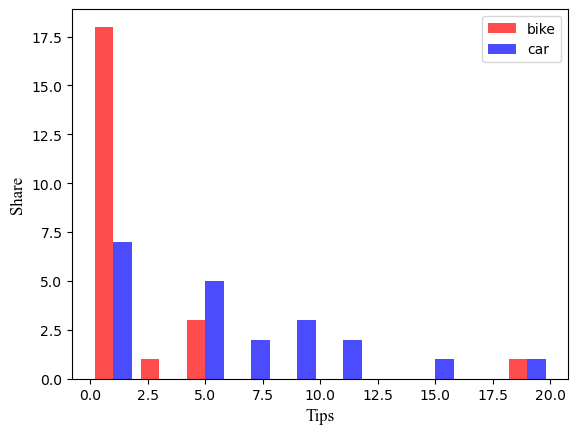

In [25]:
plt.hist([df2[df2.Arrived_in == i]['Tips'] for i in df2.Arrived_in.unique()],\
        alpha = 0.7, color = ['r', 'b'], label = df2.Arrived_in.unique())
plt.xlabel('Tips', fontname = 'Times New Roman', fontsize = 12)
plt.ylabel('Share', fontname = 'Times New Roman', fontsize = 12)
plt.legend(loc = 'upper right')
plt.show()

In [26]:
df2[(df2['Arrived_in'] == 'bike') & (df2['Tips'] == 0)].shape

(18, 6)

In [27]:
df2[(df2.Tips == 0)].shape

(25, 6)

In [28]:
df2[(df2['Arrived_in'] == 'car') & (df2['Tips'] == 0)].shape

(7, 6)

In [29]:
df2[(df2['Tips'] == 20)]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat
33,278,6,bike,evening,20,1
49,150,8,car,afternoon,20,1


In [30]:
y = df2.Tips_cat.values # чтобы получить не объект из данных, а массив np.array

In [31]:
type(y)

numpy.ndarray

In [32]:
df2[:1]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat
0,16,1,bike,morning,0,0


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              44 non-null     int64 
 1   Number_of_People  44 non-null     int64 
 2   Arrived_in        44 non-null     object
 3   Time_of_visit     44 non-null     object
 4   Tips              44 non-null     int64 
 5   Tips_cat          44 non-null     int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 2.2+ KB


In [34]:
df2[df2['Bill'] == 0]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat
21,0,0,bike,morning,0,0


In [35]:
df2.loc[21]

Bill                      0
Number_of_People          0
Arrived_in             bike
Time_of_visit       morning
Tips                      0
Tips_cat                  0
Name: 21, dtype: object

In [36]:
df2.drop(labels = [21], axis = 0, inplace = True)

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\1353060716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(labels = [21], axis = 0, inplace = True)


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              43 non-null     int64 
 1   Number_of_People  43 non-null     int64 
 2   Arrived_in        43 non-null     object
 3   Time_of_visit     43 non-null     object
 4   Tips              43 non-null     int64 
 5   Tips_cat          43 non-null     int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 2.2+ KB


## Dammy variables

техника фиктивных переменных

#1 - 0: при прочих равных фактор с 1  значимее \
    Кодируем номинальные факторы. 

## One hot encoding

Создаем матрицу n * n и проставляем единицы напротив истинных значений (фиктивные переменные)

In [38]:
arrived_in_dummy = pd.get_dummies(df2.Arrived_in)
arrived_in_dummy

,bike,car
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0


In [39]:
time_of_visit_dummy = pd.get_dummies(df2.Time_of_visit)
time_of_visit_dummy

,afternoon,evening,morning
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [40]:
merged = pd.concat([df2, time_of_visit_dummy, arrived_in_dummy], axis = 1)
merged[:2]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat,afternoon,evening,morning,bike,car
0,16,1,bike,morning,0,0,0,0,1,1,0
1,23,2,bike,morning,0,0,0,0,1,1,0


In [41]:
merged_dum = merged.drop(columns = ['Arrived_in', 'Time_of_visit'], axis = 1)
merged_dum[:2]

,Bill,Number_of_People,Tips,Tips_cat,afternoon,evening,morning,bike,car
0,16,1,0,0,0,0,1,1,0
1,23,2,0,0,0,0,1,1,0


In [42]:
merged_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Bill              43 non-null     int64
 1   Number_of_People  43 non-null     int64
 2   Tips              43 non-null     int64
 3   Tips_cat          43 non-null     int32
 4   afternoon         43 non-null     uint8
 5   evening           43 non-null     uint8
 6   morning           43 non-null     uint8
 7   bike              43 non-null     uint8
 8   car               43 non-null     uint8
dtypes: int32(1), int64(3), uint8(5)
memory usage: 1.7 KB


In [43]:
merged_dum_reg = merged_dum.drop(columns = ['Tips'], axis = 1)
merged_dum_reg[:2]

,Bill,Number_of_People,Tips_cat,afternoon,evening,morning,bike,car
0,16,1,0,0,0,1,1,0
1,23,2,0,0,0,1,1,0


In [44]:
df2['Arrived_in_1'] = df2['Arrived_in'].astype('category')
df2['Arrived_in_code'] = df2['Arrived_in_1'].cat.codes

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\3158823065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Arrived_in_1'] = df2['Arrived_in'].astype('category')
C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\3158823065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Arrived_in_code'] = df2['Arrived_in_1'].cat.codes


In [45]:
df2['Time_of_visit_1'] = df2['Time_of_visit'].astype('category')
df2['Time_of_visit_code'] = df2['Time_of_visit_1'].cat.codes

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\2813781073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time_of_visit_1'] = df2['Time_of_visit'].astype('category')
C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\2813781073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time_of_visit_code'] = df2['Time_of_visit_1'].cat.codes


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 49
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Bill                43 non-null     int64   
 1   Number_of_People    43 non-null     int64   
 2   Arrived_in          43 non-null     object  
 3   Time_of_visit       43 non-null     object  
 4   Tips                43 non-null     int64   
 5   Tips_cat            43 non-null     int32   
 6   Arrived_in_1        43 non-null     category
 7   Arrived_in_code     43 non-null     int8    
 8   Time_of_visit_1     43 non-null     category
 9   Time_of_visit_code  43 non-null     int8    
dtypes: category(2), int32(1), int64(3), int8(2), object(2)
memory usage: 2.6+ KB


In [47]:
df2.Time_of_visit_code.value_counts()

2    15
1    15
0    13
Name: Time_of_visit_code, dtype: int64

In [48]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score

In [49]:
# confusion_matrix - матрица ошибок

In [50]:
merged_dum_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Bill              43 non-null     int64
 1   Number_of_People  43 non-null     int64
 2   Tips_cat          43 non-null     int32
 3   afternoon         43 non-null     uint8
 4   evening           43 non-null     uint8
 5   morning           43 non-null     uint8
 6   bike              43 non-null     uint8
 7   car               43 non-null     uint8
dtypes: int32(1), int64(2), uint8(5)
memory usage: 1.4 KB


In [51]:
ex = pd.DataFrame(data = [['TN', 'FP'],['FN', 'TP']], columns = ['Negative (0)', 'Positive (1)'], index = ['Negative (0)', 'Positive (1)'])
ex

,Negative (0),Positive (1)
Negative (0),TN,FP
Positive (1),FN,TP


In [52]:
X = df2[['Bill', 'Number_of_People', 'Arrived_in_code', 'Time_of_visit_code']]

In [53]:
df2[:2]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat,Arrived_in_1,Arrived_in_code,Time_of_visit_1,Time_of_visit_code
0,16,1,bike,morning,0,0,bike,0,morning,2
1,23,2,bike,morning,0,0,bike,0,morning,2


In [54]:
X_reg = merged_dum_reg[['Bill', 'Number_of_People', 'afternoon', 'evening', 'morning', 'bike', 'car']]

In [55]:
y = df2.Tips_cat.values

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=10)


In [57]:
y_reg = merged_dum_reg.Tips_cat.values

In [58]:
X_reg_train, X_reg_valid, y_reg_train, y_reg_valid = train_test_split(X_reg, y_reg, test_size = 0.2, random_state=10)


In [59]:
X_train.shape

(34, 4)

In [60]:
X_reg_train.shape

(34, 7)

In [61]:
X_valid.shape

(9, 4)

In [62]:
X_reg_valid.shape

(9, 7)

Смысл логистической модели в том, что мы показываем наши тренировочные фичи, а затем тренировочный исход

Провизуализируем наши тренировочные метки, то, что модель должна будет потом угадать

In [63]:
import seaborn as sns
sns.set_style('darkgrid')

In [64]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

<AxesSubplot:xlabel='Tips_cat', ylabel='Bill'>

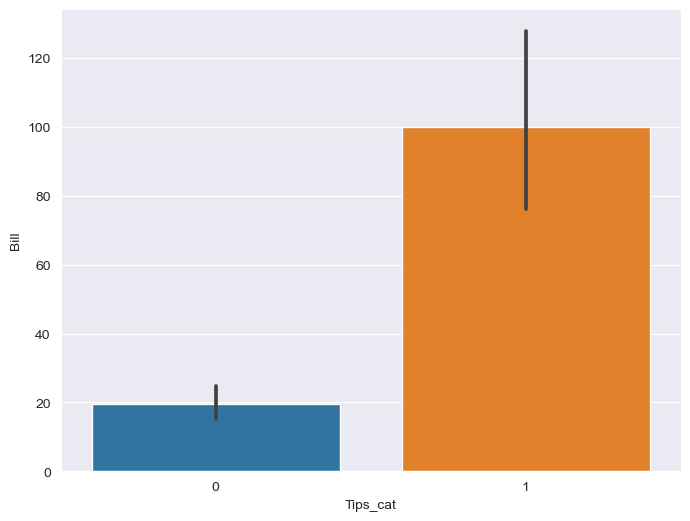

In [65]:
sns.barplot(x = 'Tips_cat', y = 'Bill', data = df2) # выводит средние значения
# но определитель (estimator) можем изменить 

In [66]:
df2[(df2['Bill'] > 0) & (df2['Tips_cat'] == 0)].mean()

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\2361857843.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[(df2['Bill'] > 0) & (df2['Tips_cat'] == 0)].mean()


Bill                  19.666667
Number_of_People       1.708333
Tips                   0.000000
Tips_cat               0.000000
Arrived_in_code        0.291667
Time_of_visit_code     1.166667
dtype: float64

<AxesSubplot:xlabel='Tips_cat', ylabel='Bill'>

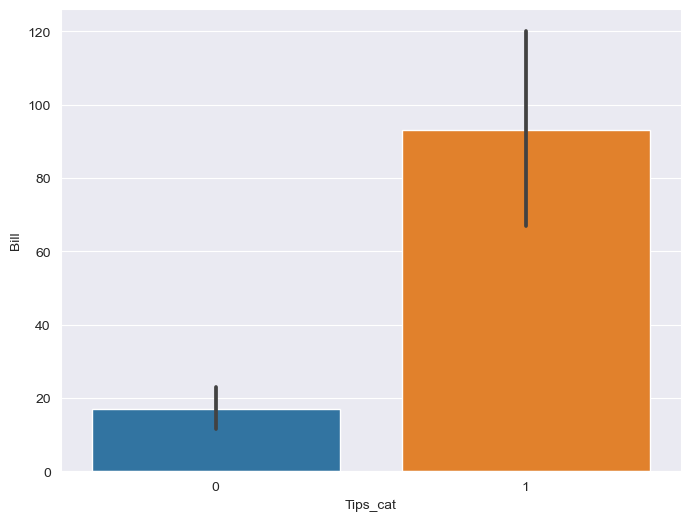

In [67]:
sns.barplot(x = 'Tips_cat', y = 'Bill', data = df2, estimator = np.median) 
# np.std...


<AxesSubplot:xlabel='Tips_cat', ylabel='Bill'>

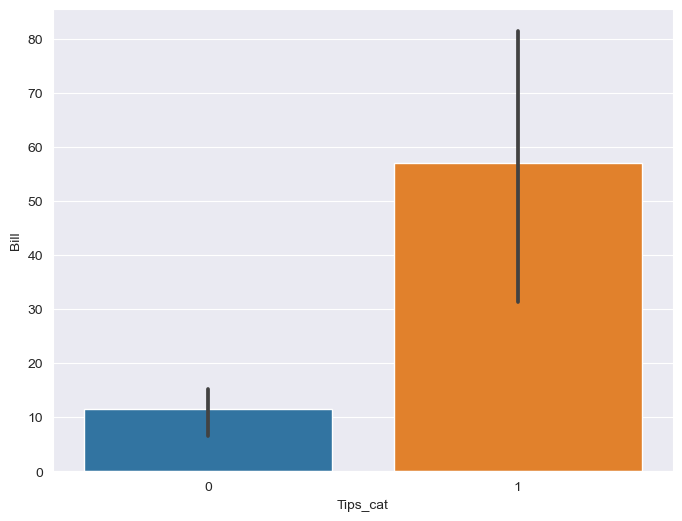

In [68]:
sns.barplot(x = 'Tips_cat', y = 'Bill', data = df2, estimator = np.std) 


Визуализируем при помощи countplot из библиотеки seaborn

__estimator в countplot считает количество совпадений__

<AxesSubplot:xlabel='Tips_cat', ylabel='count'>

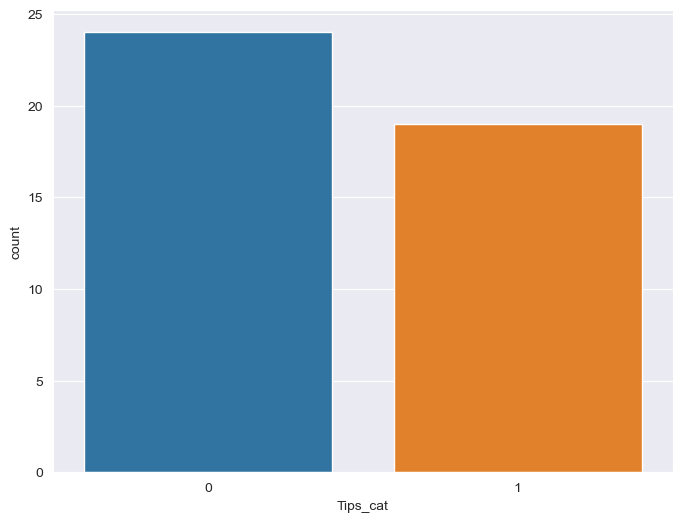

In [69]:
sns.countplot(x = 'Tips_cat', data = df2)

In [70]:
df2[df2['Tips_cat'] == 1].shape

(19, 10)

In [71]:
df2[df2['Tips_cat'] == 0].shape

(24, 10)

<AxesSubplot:xlabel='Time_of_visit', ylabel='Bill'>

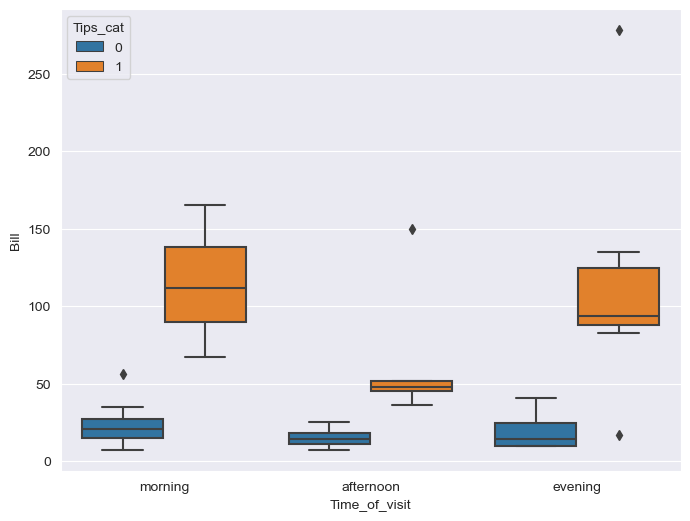

In [72]:
sns.boxplot(x = 'Time_of_visit', y = 'Bill', data = df2, hue = 'Tips_cat')

<AxesSubplot:xlabel='Time_of_visit', ylabel='Tips'>

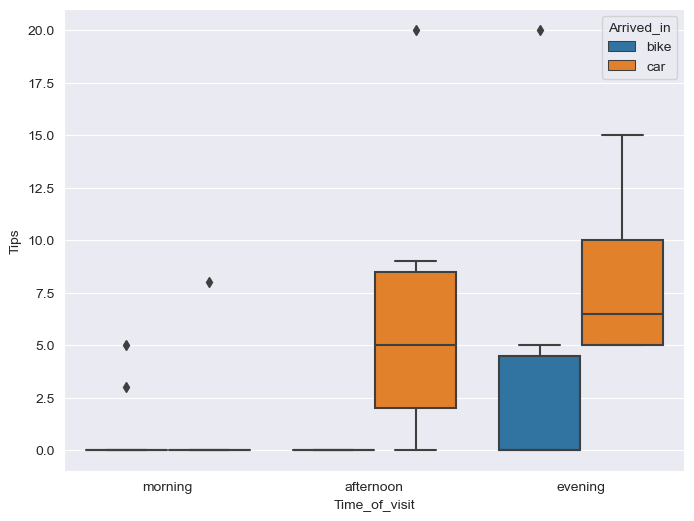

In [73]:
sns.boxplot(x = 'Time_of_visit', y = 'Tips', data = df2, hue = 'Arrived_in')

In [74]:
df2[df2['Time_of_visit'] == 'morning']

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat,Arrived_in_1,Arrived_in_code,Time_of_visit_1,Time_of_visit_code
0,16,1,bike,morning,0,0,bike,0,morning,2
1,23,2,bike,morning,0,0,bike,0,morning,2
3,56,2,car,morning,0,0,car,1,morning,2
4,27,1,bike,morning,0,0,bike,0,morning,2
9,27,1,bike,morning,0,0,bike,0,morning,2
10,27,1,bike,morning,0,0,bike,0,morning,2
12,7,2,car,morning,0,0,car,1,morning,2
13,19,1,bike,morning,0,0,bike,0,morning,2
22,8,1,car,morning,0,0,car,1,morning,2
24,35,4,bike,morning,0,0,bike,0,morning,2


<AxesSubplot:xlabel='Time_of_visit', ylabel='Tips'>

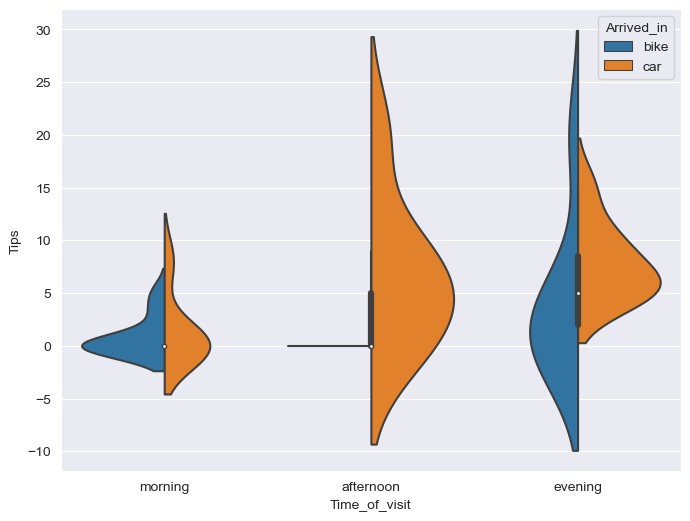

In [75]:
sns.violinplot(x = 'Time_of_visit', y = 'Tips', data = df2, hue = 'Arrived_in', split = True) 
# плотность распределения данных ( распределяется пропорционально плотности данных от средней линии, 
# простирается выше и ниже наибольшего/наименьшего значения)

In [76]:
df2_train, df2_valid = train_test_split(df2, test_size = 0.2, random_state=10)

In [77]:
df2_train.shape

(34, 10)

<AxesSubplot:xlabel='Tips_cat', ylabel='count'>

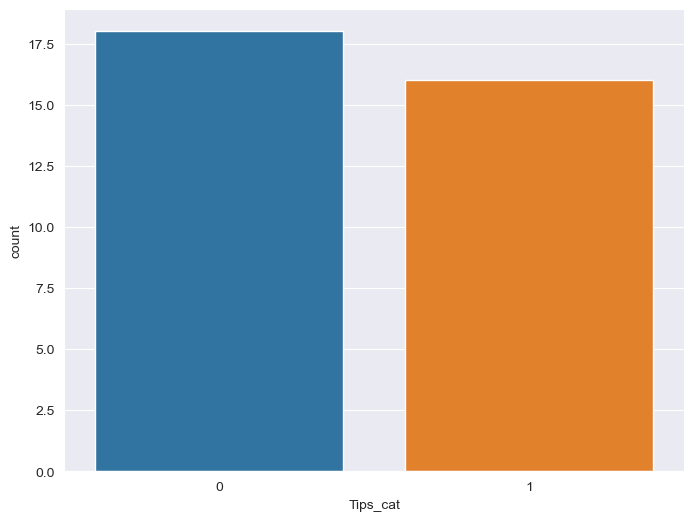

In [78]:
sns.countplot(x = 'Tips_cat', data = df2_train)

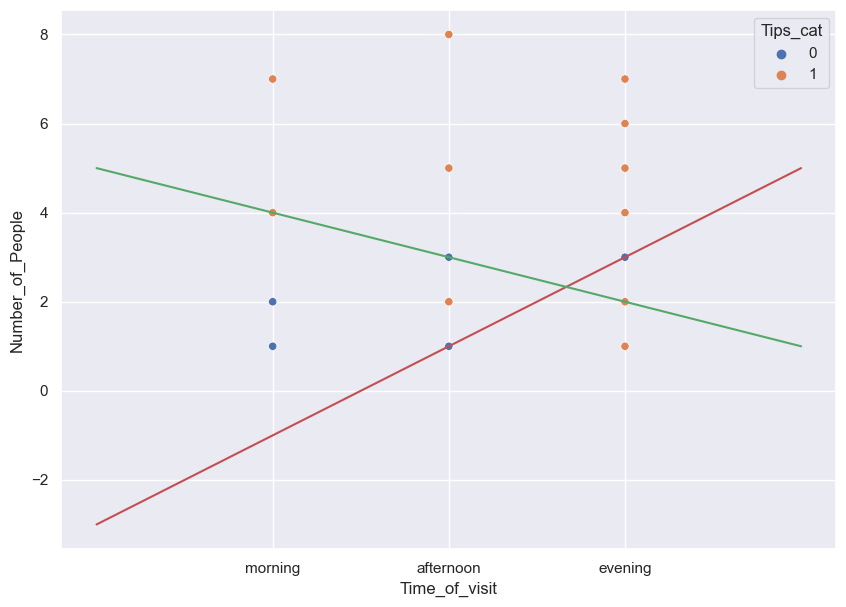

In [79]:
sns.set(rc = {'figure.figsize': (10,7)})
sns.scatterplot(x = 'Time_of_visit', y = 'Number_of_People', hue = 'Tips_cat', data = df2)


x = np.linspace(-1, 3, 50)
y1 = 2 * x - 1 
y2 = -1 * x + 4

plt.plot(x, y1, color = 'r')
plt.plot(x, y2, color = 'g')


##### Видим как распространены наши классы (Tips_cat) относительно двух параметров (Number_of_People и Time_of_visit)

__точки и расходятся, и диффундируют__ (проникают в облако друг друга)

Идеально линейно-разделимых множеств практически нет (прямых можно провести много и они будут давать разные ошибки. Как их посчитать?)

__Задача__ Подобрать прямую, которая бы минимизировала функцию потерь

__Если мы выявим ошибку и попробуем сделать ее наименьшей, мы сможем сформулировать задачу классификации__

Гипотеза, функция потерь (которую надо стремиться минимизировать), подбор параметров

In [80]:
### Нормируем данные

$$
norm_X = \frac{(X - X_{mean})}{X_{std}}
$$

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
z_score_scaler = StandardScaler() # Применяется только на обучающих данных

z_score_scaler.fit(X_train)

X_train_scaled = z_score_scaler.transform(X_train)
X_valid_scaled = z_score_scaler.transform(X_valid)

In [83]:
X_train_scaled[:2]

array([[-0.40545159,  0.53872705, -1.06066017,  0.99726775],
       [-0.88080863, -0.45136591,  0.94280904,  0.99726775]])

In [84]:
z_score_reg_scaler = StandardScaler()
z_score_reg_scaler.fit(X_reg_train)

X_train_reg_scaled = z_score_reg_scaler.transform(X_reg_train)
X_valid_reg_scaled = z_score_reg_scaler.transform(X_reg_valid)

In [85]:
X_train_reg_scaled[:2]

array([[-0.40545159,  0.53872705, -0.5547002 , -0.69156407,  1.12546287,
         1.06066017, -1.06066017],
       [-0.88080863, -0.45136591, -0.5547002 , -0.69156407,  1.12546287,
        -0.94280904,  0.94280904]])

__Создаем Logistic Regression Model__

In [86]:
Log_reg_model = LogisticRegression()

In [87]:
Log_reg_dummy_model = LogisticRegression()

In [88]:
Log_reg_model.fit(X_train_scaled, y_train) #fit model

LogisticRegression()

In [89]:
Log_reg_dummy_model.fit(X_train_reg_scaled, y_reg_train) #fit model

LogisticRegression()

In [90]:
y_pred = Log_reg_model.predict(X_valid_scaled)
y_pred_probs = Log_reg_model.predict_proba(X_valid_scaled)

In [91]:
y_pred_dummy = Log_reg_dummy_model.predict(X_valid_reg_scaled)
y_pred_probs_dummy = Log_reg_dummy_model.predict_proba(X_valid_reg_scaled)

In [92]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0])

In [93]:
y_pred_dummy

array([1, 1, 1, 0, 1, 0, 0, 0, 0])

In [94]:
y_pred_probs

array([[0.20804571, 0.79195429],
       [0.31633669, 0.68366331],
       [0.01829802, 0.98170198],
       [0.74910546, 0.25089454],
       [0.33627623, 0.66372377],
       [0.93303682, 0.06696318],
       [0.85642757, 0.14357243],
       [0.78257319, 0.21742681],
       [0.87394174, 0.12605826]])

In [95]:
y_pred_probs_dummy

array([[0.10323461, 0.89676539],
       [0.37618186, 0.62381814],
       [0.00645744, 0.99354256],
       [0.84829277, 0.15170723],
       [0.411669  , 0.588331  ],
       [0.84896372, 0.15103628],
       [0.91825669, 0.08174331],
       [0.60469882, 0.39530118],
       [0.92798352, 0.07201648]])

__Коэффициенты__

In [96]:
coef = pd.DataFrame({'Coefs' : Log_reg_model.coef_[0],
                    'Names' : ['Bill', 'Number_of_People', 'Arrived_in_code', 'Time_of_visit_code']})
coef = coef.append({'Coefs' : Log_reg_model.intercept_[0],
                   'Names' : 'intercept'}, ignore_index = True)

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\3340873020.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef = coef.append({'Coefs' : Log_reg_model.intercept_[0],


In [97]:
coef
# Log odds

,Coefs,Names
0,1.771091,Bill
1,0.851379,Number_of_People
2,0.675244,Arrived_in_code
3,-0.603724,Time_of_visit_code
4,0.201353,intercept


In [98]:
merged_dum_reg[:2]

,Bill,Number_of_People,Tips_cat,afternoon,evening,morning,bike,car
0,16,1,0,0,0,1,1,0
1,23,2,0,0,0,1,1,0


In [99]:
coef_dummy = pd.DataFrame({'Coefs_dummy' : Log_reg_dummy_model.coef_[0],
                    'Names' : ['Bill', 'Number_of_People', 'afternoon', 'evening', 'morning', 'bike', 'car']})
coef_dummy = coef_dummy.append({'Coefs_dummy' : Log_reg_dummy_model.intercept_[0],
                   'Names' : 'intercept'}, ignore_index = True)

C:\Users\Inga\AppData\Local\Temp\ipykernel_2416\3079860113.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_dummy = coef_dummy.append({'Coefs_dummy' : Log_reg_dummy_model.intercept_[0],


In [100]:
coef_dummy

,Coefs_dummy,Names
0,1.616606,Bill
1,0.910244,Number_of_People
2,0.123869,afternoon
3,0.499050,evening
4,-0.576020,morning
5,-0.422794,bike
6,0.422794,car
7,0.208715,intercept


In [101]:
coef['Odds coef'] = np.exp(coef['Coefs'])
coef
# Имеем Log odds (0) coef и Odds (1) coef
# Чем выше коэффициент, тем круче логистическая кривая
# Предикторы, обладающие большим влиянием имеют более высокие коэффициенты
# i.e. a small change in that predictor will have a big change in the outcome

# Negative coef: Increase in predictor lead to the decrease of probability of smth

# Here almost all of the coefs have a positive relationships with the predictive probability (mornong = 2)
# При увеличении счета на 1 стандартное отклонение, логарифм шанса увеличивается, predicted log odds increse by 1.7 (+) 

# При увеличении счета на 1 стандартное отклонение, ptedicted odds increase in 5.98 times (multiply) (во столько раз выше)

# Intercept more positive, more moving to the left

,Coefs,Names,Odds coef
0,1.771091,Bill,5.877265
1,0.851379,Number_of_People,2.342875
2,0.675244,Arrived_in_code,1.964512
3,-0.603724,Time_of_visit_code,0.546772
4,0.201353,intercept,1.223057


In [102]:
coef_dummy['Odds coef_dummy'] = np.exp(coef_dummy['Coefs_dummy'])
coef_dummy

,Coefs_dummy,Names,Odds coef_dummy
0,1.616606,Bill,5.035970
1,0.910244,Number_of_People,2.484929
2,0.123869,afternoon,1.131867
3,0.499050,evening,1.647156
4,-0.576020,morning,0.562131
5,-0.422794,bike,0.655213
6,0.422794,car,1.526220
7,0.208715,intercept,1.232094


__Логистическая функция (сигмоида)__

$$
p = \frac{1} {1 + {e^-}^y}
$$

$$
p = \frac {1}{1 + {e^{(\beta_0 + \beta_1 x)}}}
$$

__Уравнение логистической регрессии__

$$
y = ln(Odds) = ln(\frac{p}{1 - p}) = \beta_0 + \beta_1 \cdot x_1 + ... + = \beta_k \cdot x_k 
$$

__Порог дифференциации для predicted probability__ (threshold)

Обычно 0.5

In [103]:
X_7 = df2[['Bill', 'Number_of_People', 'Arrived_in_code', 'Time_of_visit_code']]
X_7_scaled = z_score_scaler.transform(X_7)

In [104]:
X_7_dummy = merged_dum_reg[['Bill', 'Number_of_People', 'afternoon', 'evening', 'morning', 'bike', 'car']]
X_7_scaled_dummy = z_score_reg_scaler.transform(X_7_dummy)

In [105]:
y_pred_prob = Log_reg_model.predict_proba(X_7_scaled)
y_pred_prob = y_pred_prob[:,1] # probability for the cat_1

In [106]:
y_pred_prob_dummy = Log_reg_dummy_model.predict_proba(X_7_scaled_dummy)
y_pred_prob_dummy = y_pred_prob_dummy[:,1]

In [107]:
thresh = 0.7 # harder to be classified as class 1

In [108]:
y_pred_prob_thresh = y_pred_prob > thresh
y_pred_prob_thresh
# True is higher than the threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True])

In [109]:
y_pred_prob_thresh_dummy = y_pred_prob_dummy > thresh
y_pred_prob_thresh_dummy

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [110]:
y_pred_prob_thresh = (y_pred_prob > thresh) * 1
y_pred_prob_thresh

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [111]:
y_pred_prob_thresh_dummy = (y_pred_prob_dummy > thresh) * 1
y_pred_prob_thresh_dummy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [112]:
unique, counts = np.unique(y_pred_prob_thresh, return_counts = True)
print(unique, counts)

[0 1] [29 14]


In [113]:
unique, counts = np.unique(y_pred_prob_thresh_dummy, return_counts = True)
print(unique, counts)

[0 1] [28 15]


In [114]:
thresh2 = 0.1

In [115]:
y_pred_prob_thresh2 = (y_pred_prob > thresh2) * 1
y_pred_prob_thresh2

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [116]:
unique, counts = np.unique(y_pred_prob_thresh2, return_counts = True)
print(unique, counts)

[0 1] [ 8 35]


In [117]:
y_pred_prob_thresh2_dummy = (y_pred_prob_dummy > thresh2) * 1
y_pred_prob_thresh2_dummy

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [118]:
unique_dummy, counts_dummy = np.unique(y_pred_prob_thresh2_dummy, return_counts = True)
print(unique_dummy, counts_dummy)

[0 1] [11 32]


__Regularization__

In [119]:
Logit = LogisticRegression()
Logit.fit(X_train, y_train)

print(Logit.coef_)
print(Logit.intercept_) 
#ближе к нулевым значениям

[[ 0.09869708  0.07267953  0.48386948 -0.92530261]]
[-3.73981855]


In [120]:
Logit_dummy = LogisticRegression()
Logit_dummy.fit(X_reg_train, y_reg_train)

print(Logit_dummy.coef_)
print(Logit_dummy.intercept_)

[[ 0.09762379  0.10698494  0.29977664  0.65276617 -0.95245796 -0.43201208
   0.43209693]]
[-4.3192514]


In [121]:
Logit2 = LogisticRegression(penalty = 'none')
Logit2.fit(X_train, y_train)

print(Logit2.coef_)
print(Logit2.intercept_)

[[ 0.10580783  0.18961971  1.46984151 -1.56810992]]
[-4.14058581]


In [122]:
Logit2_dummy = LogisticRegression(penalty = 'none')
Logit2_dummy.fit(X_reg_train, y_reg_train)

print(Logit2_dummy.coef_)
print(Logit2_dummy.intercept_)

[[   9.69594726   77.38946221   -1.95849006  101.85718275 -389.31225565
  -246.73752918  -42.67603379]]
[-289.41356296]


In [123]:
Logit3 = LogisticRegression(penalty = 'l2')
Logit3.fit(X_train, y_train)

print(Logit3.coef_)
print(Logit3.intercept_)

[[ 0.09869708  0.07267953  0.48386948 -0.92530261]]
[-3.73981855]


In [124]:
Logit3_dummy = LogisticRegression(penalty = 'l2')
Logit3_dummy.fit(X_reg_train, y_reg_train)

print(Logit3_dummy.coef_)
print(Logit3_dummy.intercept_)

[[ 0.09762379  0.10698494  0.29977664  0.65276617 -0.95245796 -0.43201208
   0.43209693]]
[-4.3192514]


__Метрика качества__

In [125]:
from sklearn.metrics import accuracy_score, f1_score,\
recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

####  accuracy_score - доля правильных ответов алгоритма

$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [126]:
accuracy_score(y_valid, y_pred)
print('Accuracy :', accuracy_score(y_valid, y_pred))

Accuracy : 0.8888888888888888


In [127]:
accuracy_score(y_reg_valid, y_pred_dummy)
print('Accuracy_dummy :', accuracy_score(y_reg_valid, y_pred_dummy))

Accuracy_dummy : 0.8888888888888888


__F метрика учитывает FP и FN__

F метрика близка к 0, если один из аргументов близок к 0

$$
F1 = 2 \cdot \frac{precision \cdot recall} {precision + recall}
$$

In [128]:
print('F1_score: ', f1_score(y_valid, y_pred))

F1_score:  0.8571428571428571


In [129]:
print('F1_score_dummy: ', f1_score(y_reg_valid, y_pred_dummy))

F1_score_dummy:  0.8571428571428571


__Recall (полонота) показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм__

$$
recall = \frac{TP}{TP + FN}
$$

In [130]:
print('Recall: ', recall_score(y_valid, y_pred))

Recall:  1.0


In [131]:
print('Recall_dummy: ', recall_score(y_reg_valid, y_pred_dummy))

Recall_dummy:  1.0


__Precision (точность) - доля объектов, названных классификатором положительными и при этом действительно являющиеся положительными__

Из всех объектов, которые классифицированы как принадлежащие классу, сколько на самом деле принадлежит ему?

$$
precision = \frac{TP}{TP + FP}
$$

In [132]:
print('Precision: ', precision_score(y_reg_valid, y_pred_dummy))

Precision:  0.75


In [133]:
print('Precision_dummy: ', precision_score(y_reg_valid, y_pred_dummy))

Precision_dummy:  0.75


In [134]:
sklearn.metrics.classification_report(y_reg_valid, y_pred_dummy)

'              precision    recall  f1-score   support\n\n           0       1.00      0.83      0.91         6\n           1       0.75      1.00      0.86         3\n\n    accuracy                           0.89         9\n   macro avg       0.88      0.92      0.88         9\nweighted avg       0.92      0.89      0.89         9\n'

### Metrics on train data

In [135]:
print('Accuracy :', accuracy_score(y_train, Log_reg_model.predict(X_train_scaled)))
print('F1_score: ', f1_score(y_train, Log_reg_model.predict(X_train_scaled)))
print('Recall: ', recall_score(y_train, Log_reg_model.predict(X_train_scaled)))
print('Precision: ', precision_score(y_train, Log_reg_model.predict(X_train_scaled)))

Accuracy : 0.9117647058823529
F1_score:  0.9032258064516129
Recall:  0.875
Precision:  0.9333333333333333


In [136]:
print('Accuracy_dummy :', accuracy_score(y_reg_train, Log_reg_dummy_model.predict(X_train_reg_scaled)))
print('F1_score_dummy: ', f1_score(y_reg_train, Log_reg_dummy_model.predict(X_train_reg_scaled)))
print('Recall_dummy: ', recall_score(y_reg_train, Log_reg_dummy_model.predict(X_train_reg_scaled)))
print('Precision_dummy: ', precision_score(y_reg_train, Log_reg_dummy_model.predict(X_train_reg_scaled)))

Accuracy_dummy : 0.9705882352941176
F1_score_dummy:  0.967741935483871
Recall_dummy:  0.9375
Precision_dummy:  1.0


In [137]:
confusion_matrix(y_valid, y_pred)

array([[5, 1],
       [0, 3]], dtype=int64)

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


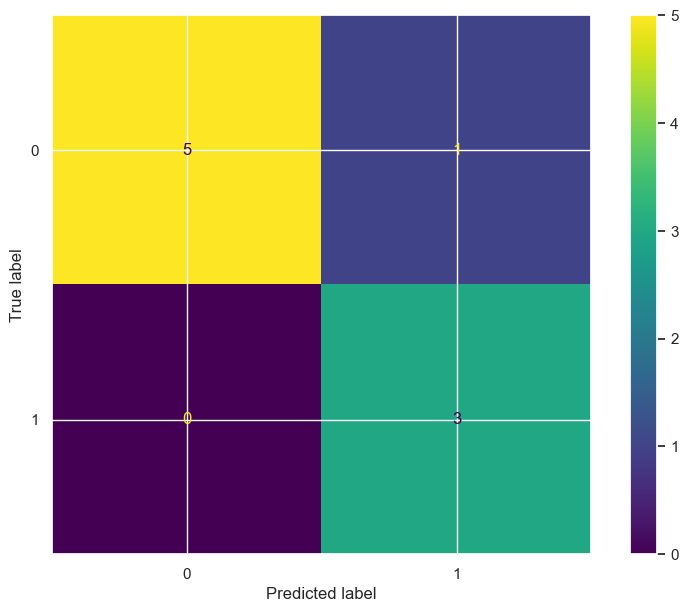

In [138]:
plot_confusion_matrix(Log_reg_model, X_valid_scaled, y_valid)

In [139]:
confusion_matrix(y_reg_valid, y_pred_dummy)

array([[5, 1],
       [0, 3]], dtype=int64)

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


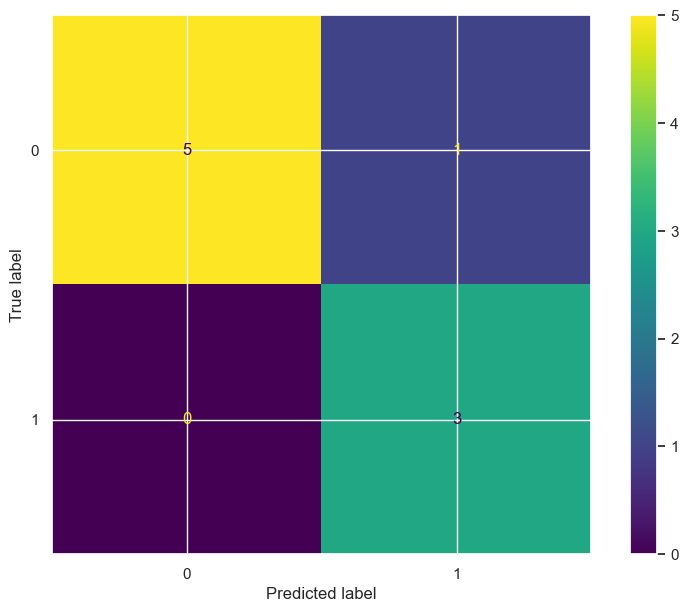

In [140]:
plot_confusion_matrix(Log_reg_dummy_model, X_valid_reg_scaled, y_reg_valid)

### Roc curve (receiver operating characteristic)
(иногда говорят «кривая ошибок»)

__Взаимосвязь между чувствительностью модели (TPR - true positive rate) и ее специфичностью (FPR - false positive rate)__

$$
TPR = \frac {TP} {TP + FN}
$$

$$
FPR = \frac {FP} {FP + TN}
$$

Сравнивается как меняется чувствительность по отношению к ложноположительным долям на разных порогах отсечения.

Идеальному соответствует ROC-кривая, проходящая через точку (0, 1), площадь под ней равна 1. Наихудшему – ROC-кривая, проходящая через точку (1, 0), площадь под ней – 0. Случайному – что-то похожее на диагональ квадрата, площадь примерно равна 0.5.

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Inga\anaconda33\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


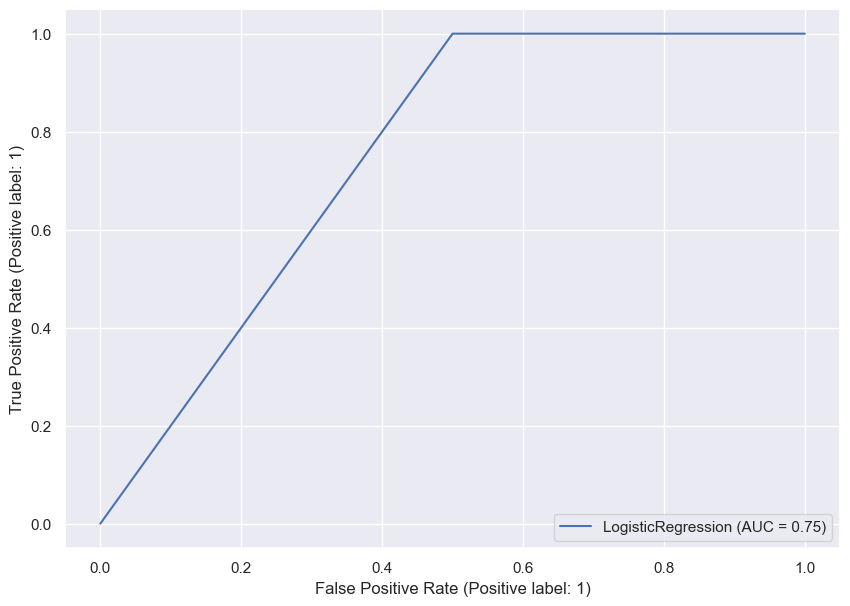

In [141]:
plot_roc_curve(Log_reg_model, X_valid, y_valid)
# area under curve

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Inga\anaconda33\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


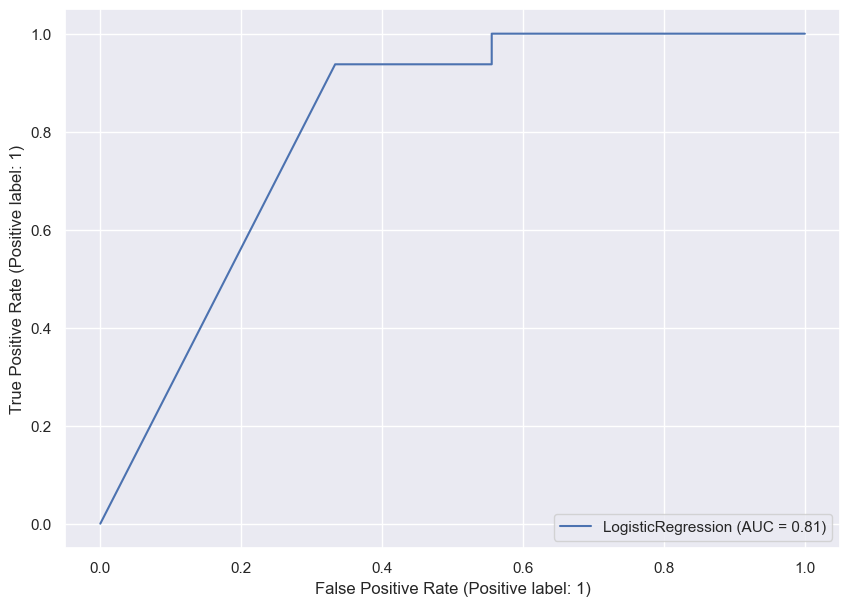

In [142]:
plot_roc_curve(Log_reg_model, X_train, y_train)

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Inga\anaconda33\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


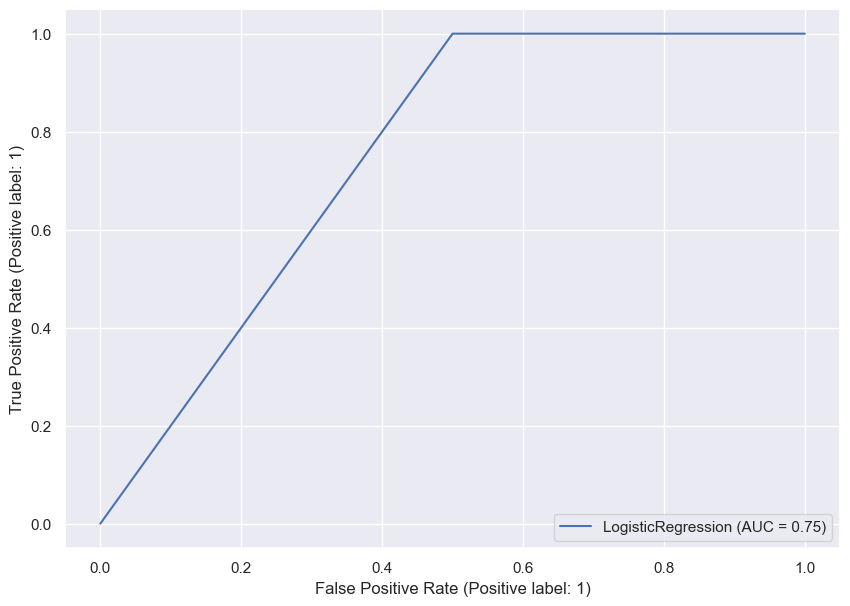

In [143]:
plot_roc_curve(Log_reg_dummy_model, X_reg_valid, y_reg_valid)


C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Inga\anaconda33\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


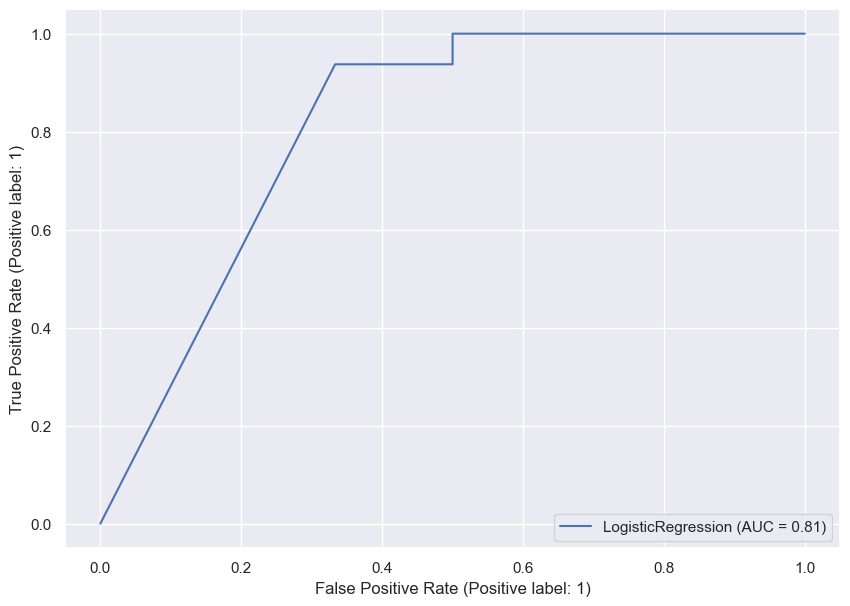

In [144]:
plot_roc_curve(Log_reg_dummy_model, X_reg_train, y_reg_train)

__Проверим работу модели на новых данных__

In [145]:
df_new = pd.read_csv('C:/Users/Inga/Market_test/Логистическая регрессия/tips_extended_new.csv')

In [146]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              10 non-null     int64 
 1   Number_of_People  10 non-null     int64 
 2   Arrived_in        10 non-null     object
 3   Time_of_visit     10 non-null     object
 4   Tips              10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


In [147]:
df_new['Arrived_in_1'] = df_new['Arrived_in'].astype('category')
df_new['Arrived_in_code'] = df_new['Arrived_in_1'].cat.codes

df_new['Time_of_visit_1'] = df_new['Time_of_visit'].astype('category')
df_new['Time_of_visit_code'] = df_new['Time_of_visit_1'].cat.codes

In [148]:
time_of_visit_new_dummy = pd.get_dummies(df_new.Time_of_visit)
time_of_visit_new_dummy


,afternoon,evening,morning
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [149]:
arrived_in_new_dummy = pd.get_dummies(df_new.Arrived_in)
arrived_in_new_dummy

,bike,car
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
5,0,1
6,1,0
7,1,0
8,0,1
9,1,0


In [150]:
df_new_merged = pd.concat([df_new, time_of_visit_new_dummy, arrived_in_new_dummy], axis = 1)
df_new_merged[:2]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Arrived_in_1,Arrived_in_code,Time_of_visit_1,Time_of_visit_code,afternoon,evening,morning,bike,car
0,6,1,bike,afternoon,0,bike,0,afternoon,0,1,0,0,1,0
1,25,4,car,evening,1,car,1,evening,1,0,1,0,0,1


In [151]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Bill                10 non-null     int64   
 1   Number_of_People    10 non-null     int64   
 2   Arrived_in          10 non-null     object  
 3   Time_of_visit       10 non-null     object  
 4   Tips                10 non-null     int64   
 5   Arrived_in_1        10 non-null     category
 6   Arrived_in_code     10 non-null     int8    
 7   Time_of_visit_1     10 non-null     category
 8   Time_of_visit_code  10 non-null     int8    
dtypes: category(2), int64(3), int8(2), object(2)
memory usage: 824.0+ bytes


In [152]:
X_new = df_new[['Bill', 'Number_of_People', 'Arrived_in_code', 'Time_of_visit_code']]
X_new[:2]

,Bill,Number_of_People,Arrived_in_code,Time_of_visit_code
0,6,1,0,0
1,25,4,1,1


In [153]:
X_new_dummy = df_new_merged[['Bill', 'Number_of_People', 'afternoon', 'evening', 'morning', 'bike', 'car']]
X_new_dummy[:2]

,Bill,Number_of_People,afternoon,evening,morning,bike,car
0,6,1,1,0,0,1,0
1,25,4,0,1,0,0,1


In [154]:
X_new_scaled = z_score_scaler.transform(X_new)

In [155]:
X_new_scaled_dummy = z_score_reg_scaler.transform(X_new_dummy)

In [156]:
y_pred_new = Log_reg_model.predict(X_new_scaled)
y_pred_new

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [157]:
y_pred_new_dummy = Log_reg_dummy_model.predict(X_new_scaled_dummy)
y_pred_new_dummy

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [158]:
print('Accuracy :', accuracy_score(df_new['Tips'], y_pred_new))
print('F1_score: ', f1_score(df_new['Tips'], y_pred_new))
print('Recall: ', recall_score(df_new['Tips'], y_pred_new))
print('Precision: ', precision_score(df_new['Tips'], y_pred_new))

Accuracy : 0.9
F1_score:  0.8571428571428571
Recall:  0.75
Precision:  1.0


In [159]:
print('Accuracy_dummy:', accuracy_score(df_new_merged['Tips'], y_pred_new_dummy))
print('F1_score_dummy: ', f1_score(df_new_merged['Tips'], y_pred_new_dummy))
print('Recall_dummy: ', recall_score(df_new_merged['Tips'], y_pred_new_dummy))
print('Precision_dummy: ', precision_score(df_new_merged['Tips'], y_pred_new_dummy))

Accuracy_dummy: 0.8
F1_score_dummy:  0.6666666666666666
Recall_dummy:  0.5
Precision_dummy:  1.0


C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


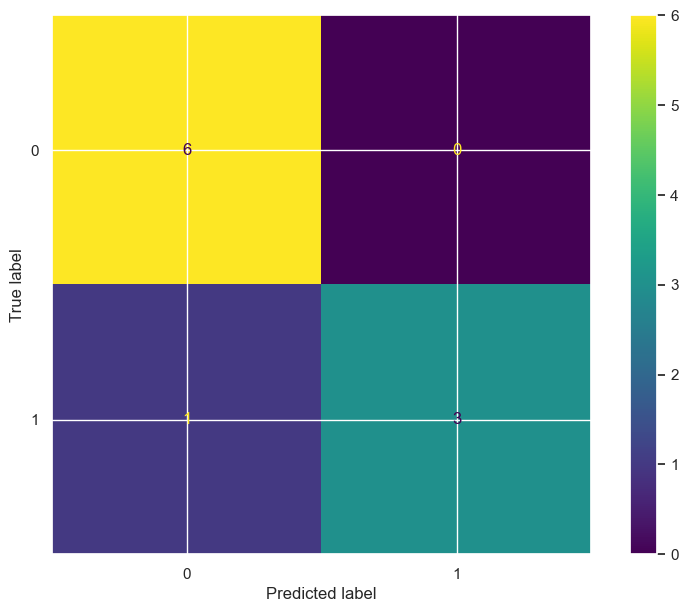

In [160]:
plot_confusion_matrix(Log_reg_model, X_new_scaled, df_new['Tips']) #confusion matrix

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


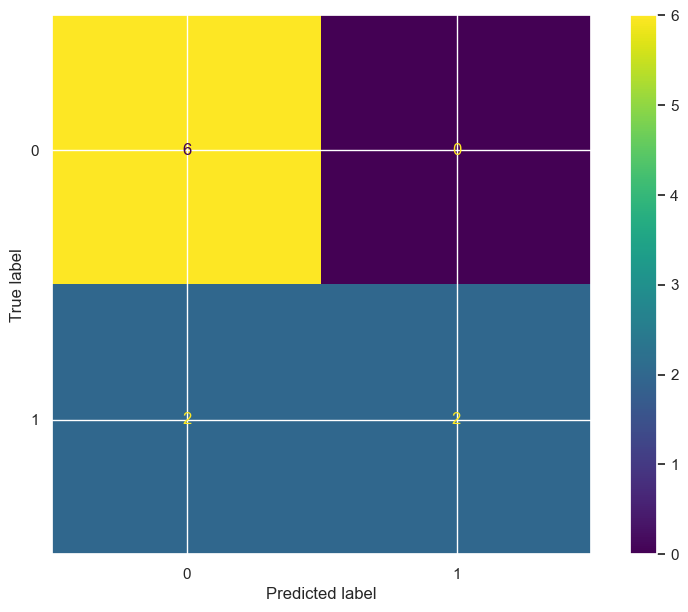

In [161]:
plot_confusion_matrix(Log_reg_dummy_model, X_new_scaled_dummy, df_new_merged['Tips']) #confusion matrix

# Факторный анализ

__Поиск основных, более влиятельных факторов__

Типы факторного анализа:
* Exploratory Factor Analysis (ищем связь наблюдаемых переменных и факторов) - самый популярный подход. 
* Confirmatory Factor Analysis (Подтверждающий ФА - есть предположение о том, что факторы связаны с определенным набором переменных и нужно это подтвердить) - редко встречается

__Суть FA__

* Помогает в интерпретации данных за счет уменьшения количества переменных;
* Снижение размерности (сокращение кол-ва переменных)(когда переменные дублируют друг друга, сильно кореллируют));
* Выявляет группы зависимых переменных (кор анализ);
* Создает новые обобщенные показатели;
* Помогает преодолевать мультиколлинеарность (перевести конфликтующие переменные в условные факторы (независимые));
* Измерение неизмеримого (лояльность потребителей, уровень счастья, вероятность банкротства) - факторный анализ выдает комбинацию признаков и их веса; Интроверт/экстраверт)

__Факторный анализ используется для объяснения дисперсии наблюдаемой переменной и объединения набора наблюдаемых переменных в ненаблюдаемую переменную, называемую факторами. Каждый фактор объясняет определенную величину дисперсии наблюдаемых переменных__

__Этапы проведения ФА:__

* Тест на адекватность (факторизуемость данных)(кроме случаев, когда нужно сократить число столбцов любой ценой)\
__1. тест Бартлетта__(Bartlett's test for equality of variances - тест о равенстве дисперсий): проверяет взаимокоррелируют ли переменные и близки ли показатели к нулю (Н_0: Корреляционная матрица совпадает с единичной). Если тест оказался статистически незначимым, то не следует использовать факторный анализ),\
- не всегда приветствуется в практике \
__2. тест Кайзера-Мейера-Олкина:__ (Kaiser-Meyer-Olkin) \
Измеряет насколько эффективен FA + насколько повысится качество от включения переменных в факторный анализ \
KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
- если какая-то переменная получится unacceptable, это значит, что тест считает, что лучше сделать эту переменную уникальной (исключить из факторного анализа, но оставить в наборе данных)

* Выбор количества факторов

* Извлечение факторов (используются метод главных компонент (Principal component analysis) & общий факторный анализ (Common factor analysis)

* Ротация факторов (факторы преобразуются в некоррелируемые факторы с целью улучшения интерпретируемости). Доступные методы вращения: \
__Orthogonal rotations:__ Varimax, Oblimax, Quartimax, Equamax;\
__Oblique rotations: (косоугольное вращение)__ Promax, Oblimin, Quartimin

__Выбор количества факторов:__
* Критерий Кайзера - выбор более значимых долей дисперсии, объясняемых фактором. Критерий выбора признака - собственное значение > 1
* Графический подход (График каменистой осыпи(график собственных значений))

__Критерий определения числа главных компонент, которые необходимо оставить:__ \
    Оставляем только те линейные комбинации, у которых собственные числи (дисперсии) > 0.8 \
    Главные компоненты часто тоже называют факторами

__PCA vs FA__

* PCA - разновидность FA. PCA - наблюдательный метод, FA - метод моделирования;
* PCA объясняет максимальную величину дисперсии, FA объясняет ковариацию данных (если данные не нормированы);
* Компоненты PCA ортогональны друг другу (некоррелируемость эквивалентна ортогональности), а FA не требует ортогональности;
* PCA - __линейная комбинация__ наблюдаемых переменных (с макс дисперсией (собственным числом)), а FA - линейная комбинация ненаблюдаемых переменных (факторов);
* Компоненты PCA не интерпретируются. В FA основные факторы поддаются маркировке и интерпретации. 
* PCA - метод уменьшения размерности, FA - метод выявления скрытых переменных.

__PCA__

$$
Y_1 = {a_1}_1X_1 + {a_1}_2X_2 + {a_1}_kX_k  
$$

дисперсия Y_1 max

$$
Y_2 = {a_2}_1X_1 + {a_2}_2X_2 + {a_2}_kX_k  
$$

дисперсия Y_2 max
corr(Y2, Y1) = 0

__FA__

$$
X_i = {a_i}_1F_1 + {a_i}_2F_2 + {a_i}_kF_k + U_i   
$$

U_i - случайная величина

$$
X = AF + U
$$

__Общность__ часть дисперсии переменной, объясненной факторами
Насколько хорошо переменная Х_i объясняется факторами

__Уникальность__ Часть дисперсии переменной, объясненной уникальными факторами.

__Оценка качества факторной модели__ \
Минимизация разности между R - R_F (матрицы корреляций)

__Слабая сторона FA__ \

Полученное решение не единственное, их множество. \
Как выбрать лучшее?

__Решение__: по аналогии с методом PCA, где главные компоненты были упорядочены по величине дисперсии, нужно выбрать то решение, которое создает диагональную матрицу, где на главной диагонали располагаются убывающие значения

Нужно такое вращение, чтобы в нем было больше чисел, близких к 1, либо близких к 0.

__Идея метода Varimax__ \ 
Решение, нацеленное на то, чтобы делать контрастные корреляции (близкие к 0 или 1)

a + b = 1 

$$
a ^ 2 + b ^ 2  -> max
$$

Такое условие возможно только при выполнении условия (a = 1; b = 0 | a = 0; b = 1)

__Практика__

In [162]:
!pip install factor_analyzer 

In [163]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

A data frame with 25 variables and 2800 observations (including missing values)

Details
A1 Am indifferent to the feelings of others. (q_146)

A2 Inquire about others' well-being. (q_1162)

A3 Know how to comfort others. (q_1206)

A4 Love children. (q_1364)

A5 Make people feel at ease. (q_1419)

C1 Am exacting in my work. (q_124)

C2 Continue until everything is perfect. (q_530)

C3 Do things according to a plan. (q_619)

C4 Do things in a half-way manner. (q_626)

C5 Waste my time. (q_1949)

E1 Don't talk a lot. (q_712)

E2 Find it difficult to approach others. (q_901)

E3 Know how to captivate people. (q_1205)

E4 Make friends easily. (q_1410)

E5 Take charge. (q_1768)

N1 Get angry easily. (q_952)

N2 Get irritated easily. (q_974)

N3 Have frequent mood swings. (q_1099)

N4 Often feel blue. (q_1479)

N5 Panic easily. (q_1505)

o1 Am full of ideas. (q_128)

o2 Avoid difficult reading material.(q_316)

o3 Carry the conversation to a higher level. (q_492)

o4 Spend time reflecting on things. (q_1738)

o5 Will not probe deeply into a subject. (q_1964)

gender Males = 1, Females =2

education 1 = HS, 2 = finished HS, 3 = some college, 4 = college graduate 5 = graduate degree



In [164]:
# https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/psych/bfi.csv

In [165]:
bfi = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/psych/bfi.csv')
bfi[:2]

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18


In [166]:
bfi.isnull().sum()

Unnamed: 0      0
A1             16
A2             27
A3             26
A4             19
A5             16
C1             21
C2             24
C3             20
C4             26
C5             16
E1             23
E2             16
E3             25
E4              9
E5             21
N1             22
N2             21
N3             11
N4             36
N5             29
O1             22
O2              0
O3             28
O4             14
O5             20
gender          0
education     223
age             0
dtype: int64

In [167]:
bfi.drop(['gender', 'education', 'age'], axis = 1, inplace = True)

In [168]:
bfi.dropna(inplace = True)

In [169]:
bfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

In [170]:
bfi.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [171]:
bfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

__Проведем тест на адекватность__

Тест Бартлетта

In [172]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(bfi)
chi_square_value, p_value

(18146.065577235386, 0.0)

Тест Кайзера-Мейера-Олкина

In [173]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(bfi)
kmo_model

0.8486452309468383

In [174]:
kmo_all

array([0.7540716 , 0.83643198, 0.87020241, 0.87804164, 0.90355905,
       0.84336264, 0.7958161 , 0.85197217, 0.8265898 , 0.86411332,
       0.83813017, 0.88388974, 0.89704594, 0.87740109, 0.89339981,
       0.7794802 , 0.78039095, 0.86239667, 0.88526811, 0.86024031,
       0.8586864 , 0.78033877, 0.84445746, 0.77017696, 0.76159382])

In [175]:
bfi.A1.shape

(2436,)

In [176]:
bfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

__Выбор количества факторов__

__Критерий Кайзера__

In [177]:
fa = FactorAnalyzer()
fa.fit(bfi)

ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

In [178]:
# Для 6 факторов собственные значения больше 1. 
# Нужно выбрать 6 факторов

__Графический подход (График каменистой осыпи(график собственных значений))__

Text(0, 0.5, 'Собственные значения')

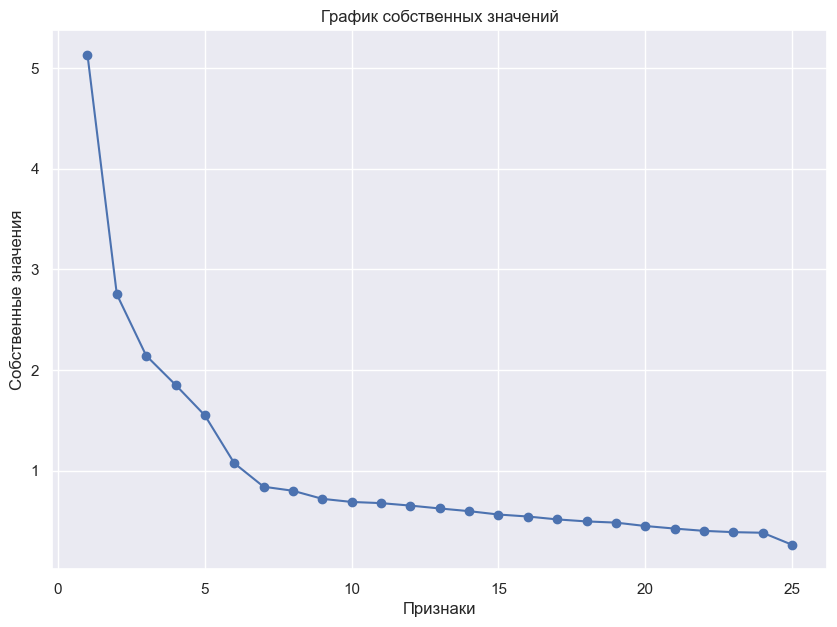

In [179]:
plt.scatter(range(1, bfi.shape[1] + 1), ev)
plt.plot(range(1, bfi.shape[1] + 1), ev)

plt.title('График собственных значений')
plt.xlabel('Признаки')
plt.ylabel('Собственные значения')

__Реализация факторного анализа__

In [180]:
fa_6 = FactorAnalyzer(6, rotation = 'varimax')
fa_6.fit(bfi)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [181]:
fa_6.loadings_

array([[ 9.52197421e-02,  4.07831567e-02,  4.87338844e-02,
        -5.30987346e-01, -1.13057329e-01,  1.61216347e-01],
       [ 3.31312763e-02,  2.35538041e-01,  1.33714394e-01,
         6.61140976e-01,  6.37337866e-02, -6.24353634e-03],
       [-9.62088414e-03,  3.43008176e-01,  1.21353367e-01,
         6.05932693e-01,  3.39902640e-02,  1.60106426e-01],
       [-8.15175587e-02,  2.19716722e-01,  2.35139532e-01,
         4.04594039e-01, -1.25338020e-01,  8.63557013e-02],
       [-1.49615885e-01,  4.14457677e-01,  1.06382165e-01,
         4.69698289e-01,  3.09765708e-02,  2.36519341e-01],
       [-4.35840228e-03,  7.72477539e-02,  5.54582254e-01,
         7.51069525e-03,  1.90123729e-01,  9.50350469e-02],
       [ 6.83300836e-02,  3.83703856e-02,  6.74545450e-01,
         5.70549867e-02,  8.75925904e-02,  1.52775080e-01],
       [-3.99936734e-02,  3.18673012e-02,  5.51164438e-01,
         1.01282240e-01, -1.13380874e-02,  8.99628297e-03],
       [ 2.16283366e-01, -6.62407723e-02, -6.384

In [182]:
pd.DataFrame(fa_6.loadings_, index = bfi.columns) # Собственные значения каждой компоненты

,0,1,2,3,4,5
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


У фактора_1 высокие факторные нагрузки по N; \
фактор_2: Е; \
фактор_3: С; \
фактор_4: А; \
фактор_5: О; \
фактор_6: можно им пренебречь и провести анализ по 5 факторам

In [183]:
fa_5 = FactorAnalyzer(5, rotation = 'varimax')
fa_5.fit(bfi)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [184]:
pd.DataFrame(fa_5.loadings_, index = bfi.columns) # Собственные значения каждой компоненты

,0,1,2,3,4
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


In [185]:
pd.DataFrame(fa_5.get_factor_variance())
# 0 - SS Loadings (sum of squared loadings)
# 1 - Proportion Var (доля дисперсий, объясняемых каждой компонентой)
# 2 - Cumulative Var 

# Всего 42% куммулятивной дисперсии объясняется 5 факторами

,0,1,2,3,4
0,2.709633,2.473090,2.041106,1.844498,1.522153
1,0.108385,0.098924,0.081644,0.073780,0.060886
2,0.108385,0.207309,0.288953,0.362733,0.423619


In [186]:
bfi_mod = pd.DataFrame(np.abs(fa_5.loadings_), index = bfi.columns)
bfi_mod


,0,1,2,3,4
A1,0.111126,0.040465,0.022798,0.428166,0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,0.066476,0.204566,0.230584,0.435624,0.112700
A5,0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,0.030855,0.023907,0.557036,0.111578,0.005183
C4,0.240410,0.064984,0.633806,0.037498,0.107535
C5,0.290318,0.176395,0.562467,0.047525,0.036822


Text(142.25, 0.5, 'Диапазон')

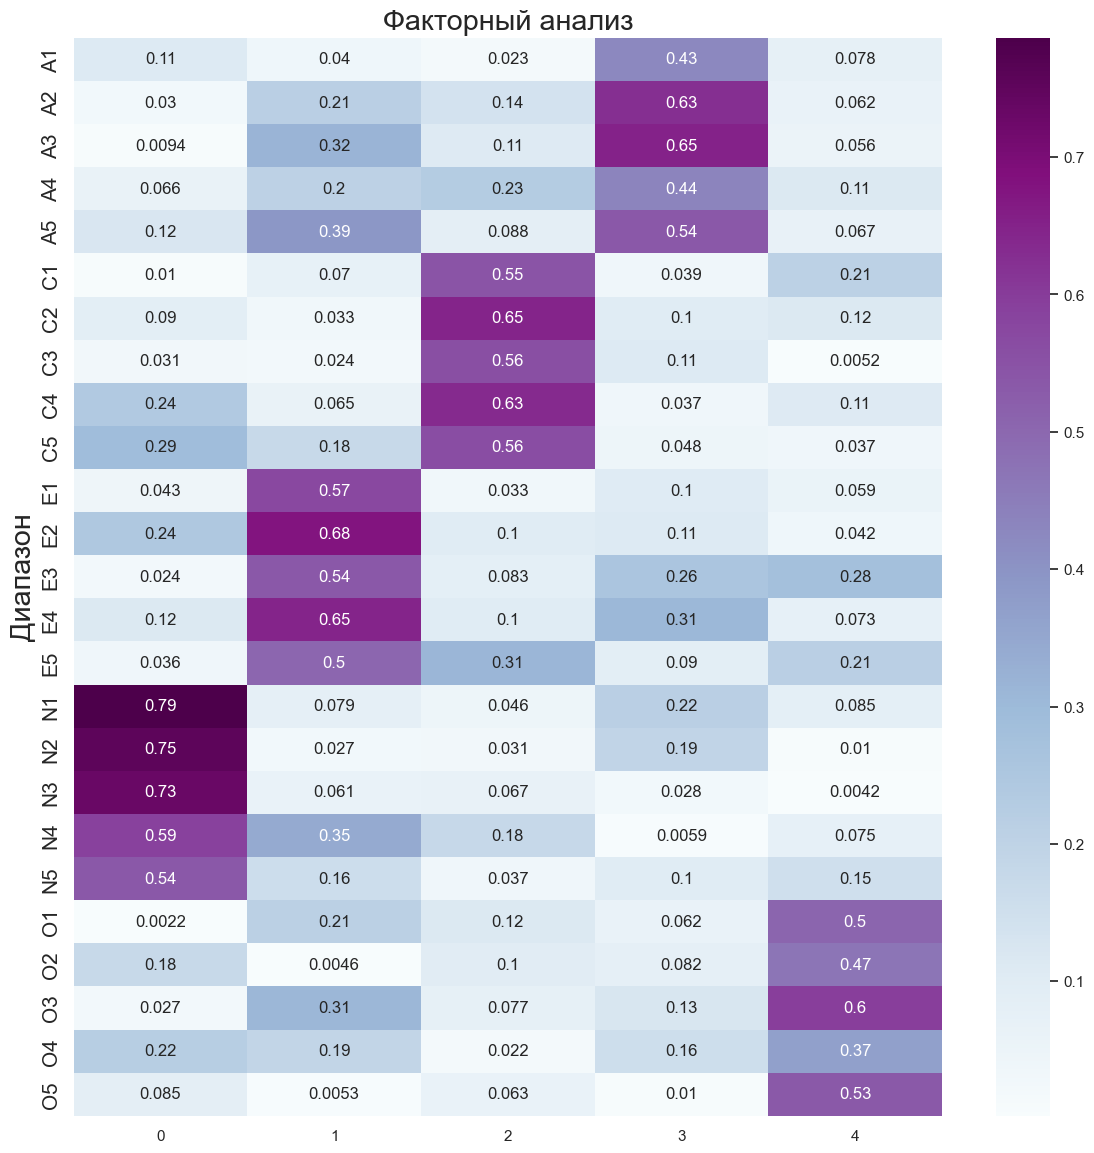

In [187]:
plt.figure(figsize = (14,14))
ax = sns.heatmap(bfi_mod, annot = True, cmap = 'BuPu')

ax.yaxis.set_tick_params(labelsize = 15)
plt.title('Факторный анализ', fontsize = 'xx-large')

plt.ylabel('Диапазон', fontsize = 'xx-large')
